In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
series = pd.read_csv(
    './data/daily-minimum-temperatures.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    squeeze=True)

In [3]:
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

# Resampling 
- Resampling = involve in changing the frequency of time-series observations
	- Upsampling: increase the frequency of the samples
		+ Eg: minutes -> seconds
	- Downsampling: decrease the frequency of the samples
		+ Eg: minutes -> hours

In [4]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv(
    './data/shampoo-sales.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    squeeze=True,
    date_parser=parser)

series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

## Upsampling

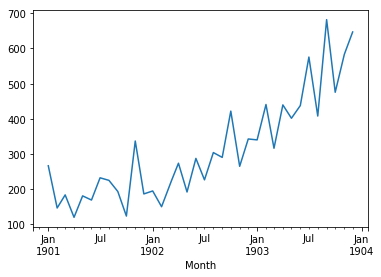

In [5]:
# months -> days: interpolate = linear
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')

interpolated.plot()
plt.show()

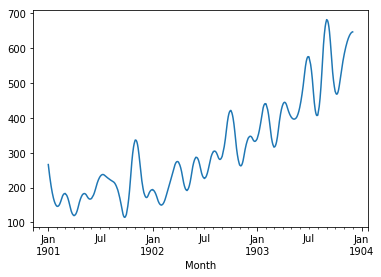

In [6]:
# months -> days: interpolate = spline
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)

interpolated.plot()
plt.show()

## Downsampling Data

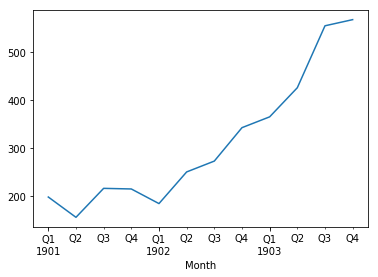

In [7]:
# months -> Quarters, method = mean
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()

quarterly_mean_sales.plot()
plt.show()

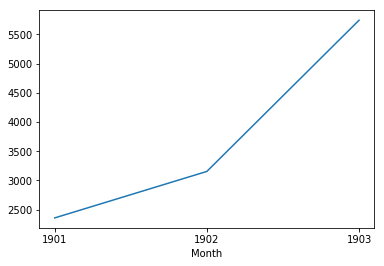

In [8]:
# months -> years, method = sum
resample = series.resample('A')
yearly_sum_sales = resample.sum()

yearly_sum_sales.plot()
plt.show()